## Data Analysis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data = pd.read_csv('churn_data.csv')

In [6]:
print(data.shape)

(27000, 31)


In [8]:
pd.pandas.set_option('display.max_columns', None)

In [9]:
data.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,app_web_user,ios_user,android_user,registered_phones,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,Bi-Weekly,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,96,0,0,5,1,1,1,1,0,0,Weekly,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,285,0,0,9,1,0,0,0,1,2,Semi-Monthly,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,74,0,0,26,1,0,0,0,1,0,Bi-Weekly,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,0,0,0,0,1,1,1,0,1,0,Bi-Weekly,0,0,0,0,Aries,1,0,1.0,0.03,0


## Missing values

In [12]:
vars_with_na = [var for var in data.columns if data[var].isnull().sum()>1]

for var in vars_with_na:
    print(var, np.round(data[var].isnull().mean(), 3), '% missing values')

age 0.0 % missing values
credit_score 0.297 % missing values
rewards_earned 0.12 % missing values


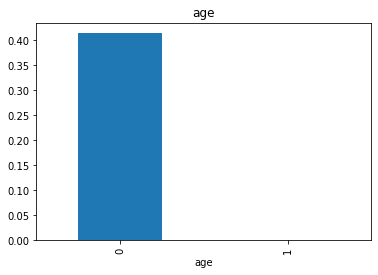

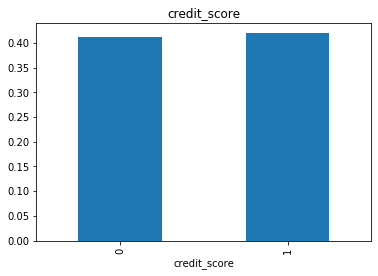

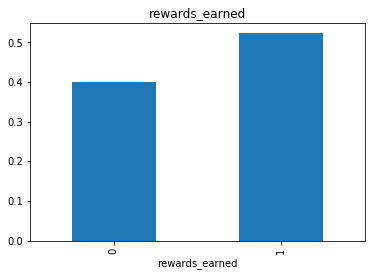

In [17]:
def analyse_na_values(df, var):
    df = df.copy()
    
    df[var] = np.where(df[var].isnull(), 1, 0)
    
    df.groupby(var)['churn'].mean().plot.bar()
    plt.title(var)
    plt.show()
    
for var in vars_with_na:
    analyse_na_values(data, var)

## numerical variable

In [19]:
num_vars = [var for var in data.columns if data[var].dtypes != 'O']

print('Number of numerical values', len(num_vars))

data[num_vars].head()

Number of numerical values 28


,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,app_web_user,ios_user,android_user,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,NaN,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,1,0,NaN,0.00,0
1,23547,0,28.0,486.0,0,0,1,0,0,96,0,0,5,1,1,1,1,0,0,0,0,0,0,0,0,44.0,1.47,1
2,58313,0,35.0,561.0,47,2,86,47,0,285,0,0,9,1,0,0,0,1,2,0,0,0,0,1,0,65.0,2.17,0
3,8095,0,26.0,567.0,26,3,38,25,0,74,0,0,26,1,0,0,0,1,0,0,0,0,0,0,0,33.0,1.10,1
4,61353,1,27.0,NaN,0,0,2,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,1,0,1.0,0.03,0
